# Data Set Information

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

# Loading Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

np.random.seed(37)
df = pd.read_csv("Power-Plant-Dataset.csv", header=None)
df.head()

,0,1,2,3,4
0,AT,V,AP,RH,PE
1,14.96,41.76,1024.07,73.17,463.26
2,25.18,62.96,1020.04,59.08,444.37
3,5.11,39.4,1012.16,92.14,488.56
4,20.86,57.32,1010.24,76.64,446.48


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9569 entries, 0 to 9568
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9569 non-null   object
 1   1       9569 non-null   object
 2   2       9569 non-null   object
 3   3       9569 non-null   object
 4   4       9569 non-null   object
dtypes: object(5)
memory usage: 373.9+ KB


In [3]:
df.describe()

,0,1,2,3,4
count,9569,9569,9569,9569,9569
unique,2774,635,2518,4547,4837
top,25.21,70.32,1013.88,100.09,468.8
freq,14,61,16,26,9


# Splitting Data

In [4]:
data = df.values
df.columns = data[0]
df.columns
# df.values

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [5]:
x = data[1:,:-1]
x = x.astype(np.float)
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [6]:
y = data[1:,-1:]
y = y.astype(np.float)
y

array([[463.26],
       [444.37],
       [488.56],
       ...,
       [429.57],
       [435.74],
       [453.28]])

# Using LinearRegression

Linear regression performs exceptionally well for linearly separable data and efficent to train

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 37)
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

Estimated coefficients for the linear regression problem and Independent term in the linear model.

In [8]:
print(LR.coef_)

[[-1.96868557 -0.23719363  0.06775378 -0.15486121]]


In [9]:
print(LR.intercept_)

[448.68081795]


In [10]:
y_prediction =  LR.predict(x_test)
y_prediction

array([[426.66246517],
       [450.69392567],
       [429.58342365],
       ...,
       [445.810711  ],
       [484.95796641],
       [470.36405436]])

# Evaluation of the performance on the test set

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.9296978152560545
mean_sqrd_error is== 20.30549156561452
root_mean_squared error of is== 4.506161511265938


We have %92 accuracy

# Plotting Result
Residual Analysis

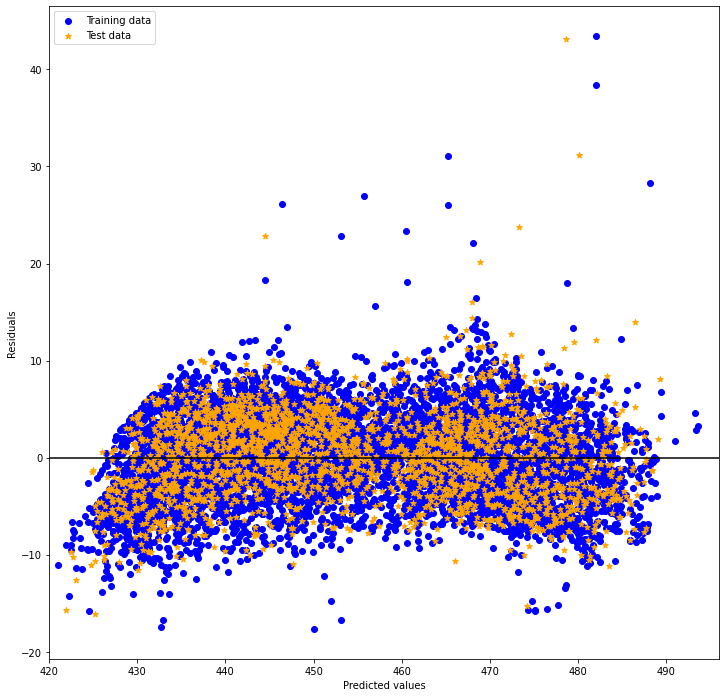

In [12]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

y_train_pred = LR.predict(x_train)
plt.figure(figsize=(12,12))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_prediction, y_prediction - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=420, xmax=496,  color='k') # Net hourly electrical energy output (EP) 420.26-495.76 MW
plt.xlim([420, 496])
plt.show()